In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/kaggle/input/global-weather-trends-4800/weather_dataset_19-01-2020.csv")

In [3]:
df.head()

,index,current_time,crawled_at,pressure,country,wind_direction,sky,uniq_id,visibility,temparature,dev_point,place,location,data_category,latest_report,wind,forecast,feels_like,index_date_format
0,0,"19 Jan 2020, 11:06:34",Sun Jan 19 15:36:34 2020,1020 mbar,Albania,from Southeast,Broken clouds.,6817a79c-0213-5c79-bb75-88bc16ca44dd,N/A,11 °C,8 °C,"Weather in Gjirokastër, Albania",Kerkyra Airport,weather,"19 Jan 2020, 10:20",11 km/h,13 / 2 °C,10 °C,2020.01.19
1,1,"19 Jan 2020, 20:36:34",Sun Jan 19 15:36:34 2020,1008 mbar,Australia,from South,Cool.,215d740f-ed79-5643-80a3-5fdcbc7b6b54,N/A,16 °C,15 °C,"Weather in Mount Gambier, South Australia, Au...",Mount Gambier Aerodrome,weather,"19 Jan 2020, 19:30",30 km/h,16 / 13 °C,16 °C,2020.01.19
2,2,"19 Jan 2020, 21:06:34",Sun Jan 19 15:36:34 2020,1006 mbar,Australia,na,Mild.,fe46e09e-8735-54bd-9e86-19ae8335e915,N/A,22 °C,19 °C,"Weather in Eden, New South Wales, Australia",Green Cape Aws,weather,"19 Jan 2020, 20:00",No wind,25 / 18 °C,21 °C,2020.01.19
3,3,"19 Jan 2020, 11:06:34",Sun Jan 19 15:36:34 2020,1012 mbar,Angola,from Southwest,Scattered clouds.,6aa0c99b-30b6-5e10-bddc-523b24ca8f63,N/A,30 °C,25 °C,"Weather in Cabinda, Angola",Pointe Airport-Noire,weather,"19 Jan 2020, 10:00",7 km/h,30 / 26 °C,36 °C,2020.01.19
4,4,"19 Jan 2020, 11:06:34",Sun Jan 19 15:36:35 2020,N/A,Austria,from Southwest,Overcast.,6fc9e671-d5ad-563f-8c03-ade510d95ef0,12 km,-2 °C,-5 °C,"Weather in Mayrhofen, Tyrol, Austria",Krimml,weather,"19 Jan 2020, 10:00",2 km/h,0 / -9 °C,-2 °C,2020.01.19


In [4]:
print(df.columns)

Index(['index', 'current_time', 'crawled_at', 'pressure', 'country',
       'wind_direction', 'sky', 'uniq_id', 'visibility', 'temparature',
       'dev_point', 'place', 'location', 'data_category', 'latest_report',
       'wind', 'forecast', 'feels_like', 'index_date_format'],
      dtype='object')


In [5]:
df['latest_report'] = pd.to_datetime(df['latest_report'])
df['Year'] = df['latest_report'].dt.year

In [6]:
df_country_temp = df[['country', 'temparature', 'Year']]

In [7]:
# Sıcaklık sütununda yer alan unique değerleri göster
print(df['temparature'].unique())


['11\xa0°C' '16\xa0°C' '22\xa0°C' '30\xa0°C' '-2\xa0°C' '2\xa0°C'
 '12\xa0°C' '-4\xa0°C' '24\xa0°C' '8\xa0°C' '6\xa0°C' '26\xa0°C'
 '27\xa0°C' '0\xa0°C' '4\xa0°C' '3\xa0°C' '1\xa0°C' '-1\xa0°C' '5\xa0°C'
 '28\xa0°C' '23\xa0°C' '25\xa0°C' '-14\xa0°C' nan '-12\xa0°C' '-7\xa0°C'
 '-16\xa0°C' '15\xa0°C' '9\xa0°C' '14\xa0°C' '13\xa0°C' '18\xa0°C'
 '19\xa0°C' '21\xa0°C' '20\xa0°C' '10\xa0°C' '32\xa0°C' '29\xa0°C'
 '35\xa0°C' '40\xa0°C' '36\xa0°C' '17\xa0°C' '31\xa0°C' '34\xa0°C'
 '33\xa0°C' '-3\xa0°C' '7\xa0°C' '-5\xa0°C' '-17\xa0°C' '-6\xa0°C'
 '-24\xa0°C' '-13\xa0°C' '-31\xa0°C' '-28\xa0°C' '-10\xa0°C' '-26\xa0°C'
 '-23\xa0°C' '-19\xa0°C' '-11\xa0°C' '-35\xa0°C' '-25\xa0°C' '-21\xa0°C'
 '-32\xa0°C' '-27\xa0°C' '-15\xa0°C' '-30\xa0°C' '-42\xa0°C' '-8\xa0°C'
 '-22\xa0°C' '-18\xa0°C' '-44\xa0°C' '-29\xa0°C' '-33\xa0°C' '-41\xa0°C'
 '-9\xa0°C' '-20\xa0°C' '-36\xa0°C' '-34\xa0°C' '-38\xa0°C' '-48\xa0°C'
 '-51\xa0°C']


In [8]:
df['temparature'] = df['temparature'].str.replace('°C', '').astype(float)

In [9]:
df_country_temp = df[['country', 'temparature', 'Year']]

In [10]:
df_avg_temp_by_country = df_country_temp.groupby(['country', 'Year'])['temparature'].mean().reset_index()

In [11]:
countries_to_plot = ['Turkey', 'United States', 'India', 'Russia', 'China', 'Saudi Arabia']

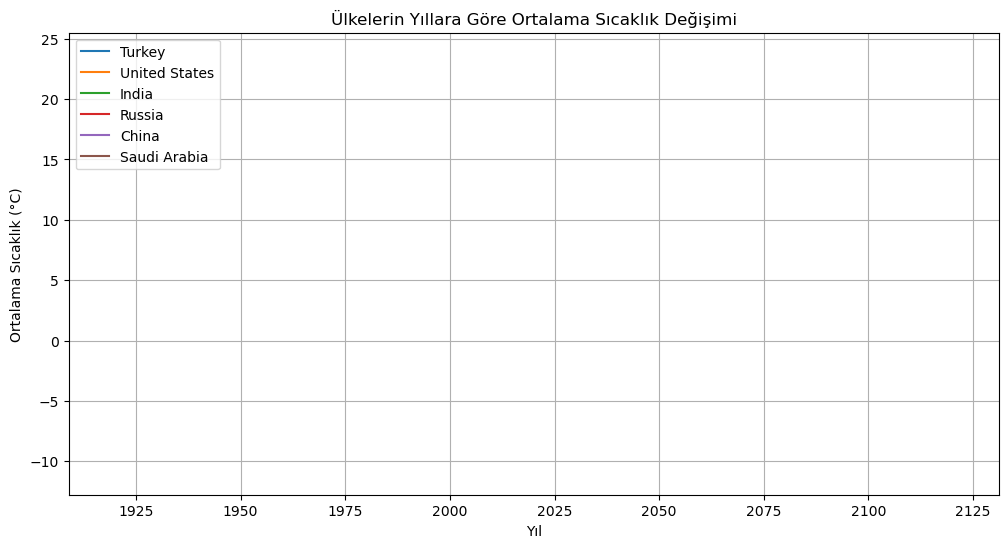

In [12]:
plt.figure(figsize=(12, 6))
for country in countries_to_plot:
    df_country = df_avg_temp_by_country[df_avg_temp_by_country['country'] == country]
    plt.plot(df_country['Year'], df_country['temparature'], label=country)

plt.xlabel("Yıl")
plt.ylabel("Ortalama Sıcaklık (°C)")
plt.title("Ülkelerin Yıllara Göre Ortalama Sıcaklık Değişimi")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [13]:
print(df_avg_temp_by_country)


         country  Year  temparature
0    Afghanistan  2020     7.000000
1        Albania  2020     9.142857
2        Algeria  2020    10.333333
3        Andorra  2020     6.000000
4         Angola  2020    30.000000
..           ...   ...          ...
177      Vietnam  2020    24.428571
178  Württemberg  2020     1.000000
179        Yemen  2020    24.000000
180       Zambia  2020          NaN
181     Zimbabwe  2020    24.000000

[182 rows x 3 columns]


In [14]:
# Eksik değerleri ülkelerin genel ortalama sıcaklık değeri ile dolduruyoruz
average_temp = df_avg_temp_by_country['temparature'].mean()
df_avg_temp_by_country['temparature'].fillna(average_temp, inplace=True)


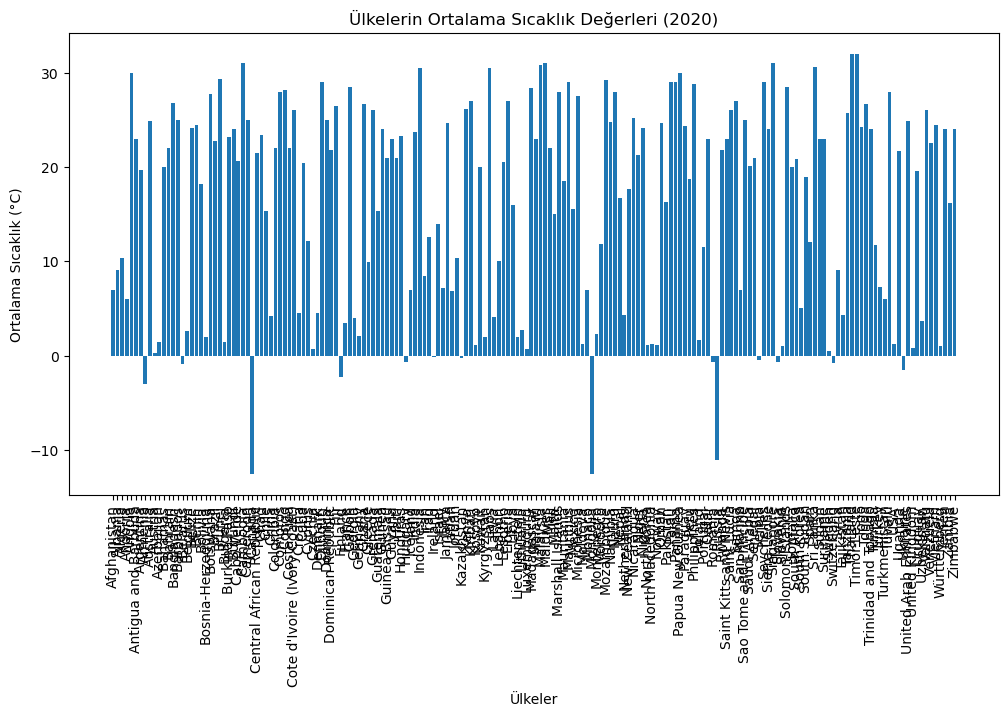

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(df_avg_temp_by_country['country'], df_avg_temp_by_country['temparature'])
plt.xticks(rotation=90)
plt.xlabel('Ülkeler')
plt.ylabel('Ortalama Sıcaklık (°C)')
plt.title('Ülkelerin Ortalama Sıcaklık Değerleri (2020)')
plt.show()

In [16]:
selected_countries = ['Turkey', 'United States', 'India', 'Russia', 'China', 'Saudi Arabia']

In [17]:
selected_countries_data = df_avg_temp_by_country[df_avg_temp_by_country['country'].isin(selected_countries)]

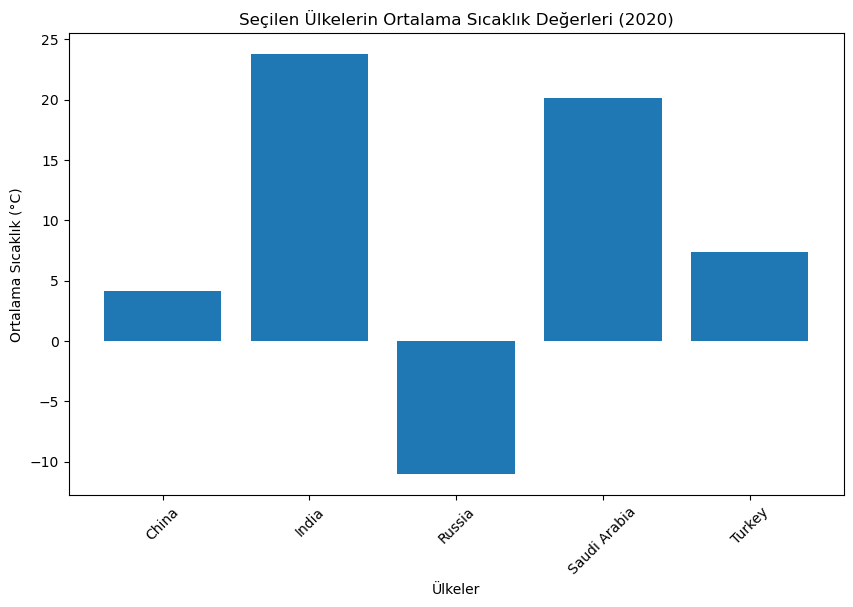

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(selected_countries_data['country'], selected_countries_data['temparature'])
plt.xticks(rotation=45)
plt.xlabel('Ülkeler')
plt.ylabel('Ortalama Sıcaklık (°C)')
plt.title('Seçilen Ülkelerin Ortalama Sıcaklık Değerleri (2020)')
plt.show()

In [19]:
selected_countries_data_sorted = selected_countries_data.sort_values(by='temparature')

In [20]:
# En yüksek ve en düşük sıcaklık değerine sahip ülkeleri alıyoruz
lowest_temperature_country = selected_countries_data_sorted.iloc[0]['country']
highest_temperature_country = selected_countries_data_sorted.iloc[-1]['country']

In [21]:
temperature_difference = selected_countries_data_sorted.iloc[-1]['temparature'] - selected_countries_data_sorted.iloc[0]['temparature']

In [22]:
print(f"En düşük ortalama sıcaklığa sahip ülke: {lowest_temperature_country}")
print(f"En yüksek ortalama sıcaklığa sahip ülke: {highest_temperature_country}")
print(f"Bu iki ülke arasındaki sıcaklık farkı: {temperature_difference:.2f} °C")

En düşük ortalama sıcaklığa sahip ülke: Russia
En yüksek ortalama sıcaklığa sahip ülke: India
Bu iki ülke arasındaki sıcaklık farkı: 34.79 °C


In [23]:
lowest_temperature_row = df.loc[df['temparature'].idxmin()]
highest_temperature_row = df.loc[df['temparature'].idxmax()]

In [24]:
lowest_temperature_country = lowest_temperature_row['country']
highest_temperature_country = highest_temperature_row['country']
lowest_temperature = lowest_temperature_row['temparature']
highest_temperature = highest_temperature_row['temparature']

In [25]:
print(f"En düşük sıcaklığa sahip ülke: {lowest_temperature_country}, Sıcaklık: {lowest_temperature:.2f} °C")
print(f"En yüksek sıcaklığa sahip ülke: {highest_temperature_country}, Sıcaklık: {highest_temperature:.2f} °C")

En düşük sıcaklığa sahip ülke: Russia, Sıcaklık: -51.00 °C
En yüksek sıcaklığa sahip ülke: Australia, Sıcaklık: 40.00 °C
